In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import os


In [2]:
# Define base paths
data_dir = "../../data/loaded"
Images_dir = "../../images/processing_1"
processed_data_dir = "../../data/processed"
fire_file_path = os.path.join(data_dir, "fire.csv")

In [ ]:
fire_df = pd.read_csv(fire_file_path)

# 1- Keep only rows where type=0

In [5]:
## keep only rows where type=0
fire_df_0 = fire_df[fire_df['type'] == 0]
fire_df_0.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type,country
5,35.70751,5.53337,312.32,0.45,0.39,2024-01-01,141,N20,VIIRS,n,2,268.88,1.25,N,0,Algeria
13,32.13579,6.46961,326.80,0.56,0.43,2024-01-01,142,N20,VIIRS,n,2,279.44,5.52,N,0,Algeria
20,32.35563,6.97630,341.76,0.39,0.44,2024-01-01,142,N20,VIIRS,n,2,280.66,10.25,N,0,Algeria
64,28.19791,9.39581,327.82,0.33,0.55,2024-01-01,143,N20,VIIRS,n,2,277.00,1.44,N,0,Algeria
67,28.12826,9.49323,308.57,0.33,0.55,2024-01-01,143,N20,VIIRS,n,2,278.63,0.85,N,0,Algeria


In [8]:
print("original rows:", len(fire_df))
print("rows with type=0:", len(fire_df_0))
print("removed rows (percentage):", (len(fire_df) - len(fire_df_0)) / len(fire_df) * 100)

original rows: 90250
rows with type=0: 14216
removed rows (percentage): 84.24819944598339


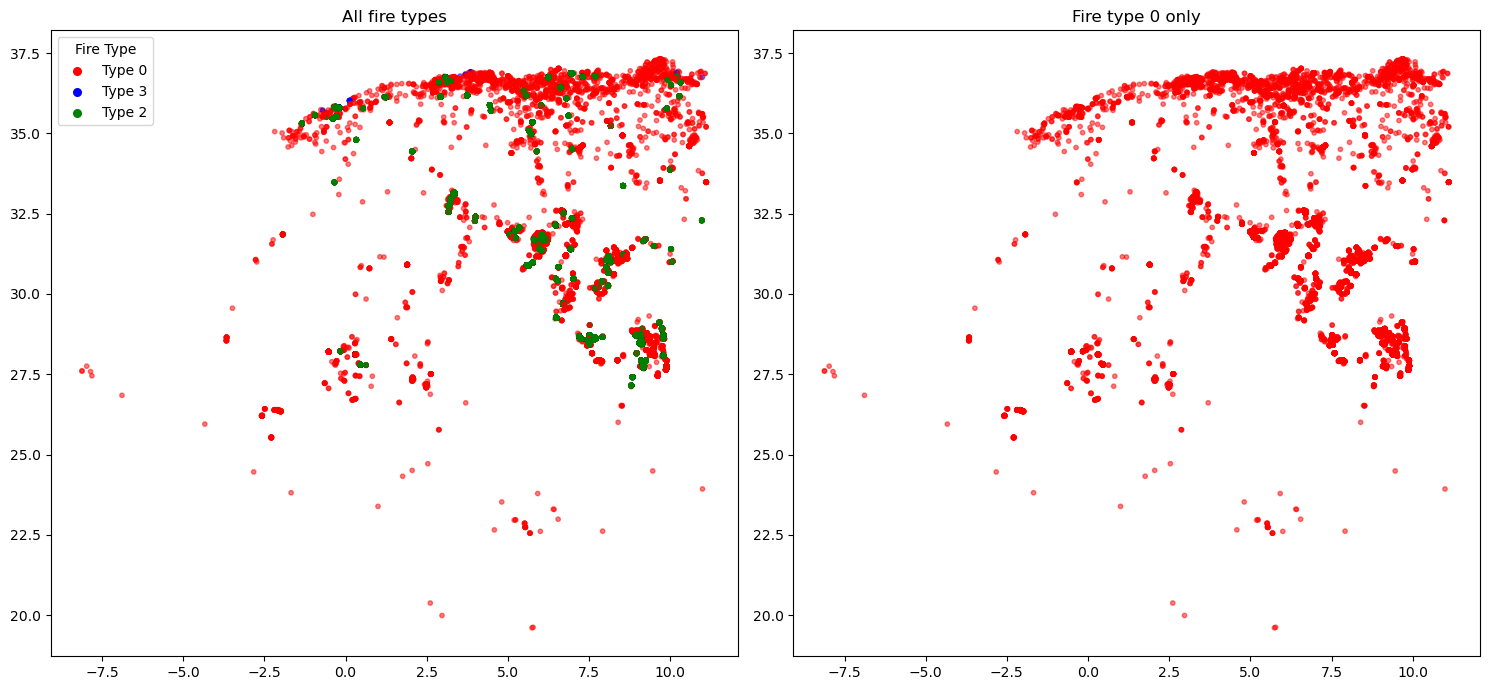

In [20]:
color_dict = {0: 'red', 3: 'blue', 2: 'green'}
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].scatter(fire_df['longitude'], fire_df['latitude'], c=fire_df['type'].map(color_dict), alpha=0.5, s=10)
axes[0].set_title('All fire types')
for t, c in color_dict.items():
    axes[0].scatter([], [], color=c, label=f'Type {t}', s=30)
axes[0].legend(title='Fire Type')
axes[1].scatter(fire_df_0['longitude'], fire_df_0['latitude'], c=fire_df_0['type'].map(color_dict), alpha=0.5, s=10)
axes[1].set_title('Fire type 0 only')
plt.tight_layout()
plt.savefig(os.path.join(Images_dir, "fire_type_filtering.png"))
plt.show()


# 2- remove unecessary columns

In [9]:
cols_to_keep = ['latitude','longitude','acq_date']
fire_df_cleaned = fire_df_0[cols_to_keep]
fire_df_cleaned.head()

,latitude,longitude,acq_date
5,35.70751,5.53337,2024-01-01
13,32.13579,6.46961,2024-01-01
20,32.35563,6.97630,2024-01-01
64,28.19791,9.39581,2024-01-01
67,28.12826,9.49323,2024-01-01


In [10]:
print("original nb cols:", len(fire_df.columns))
print("cleaned nb cols:", len(fire_df_cleaned.columns))

original nb cols: 16
cleaned nb cols: 3


In [ ]:
# print duplicates
duplicates = fire_df_cleaned[fire_df_cleaned.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [latitude, longitude, acq_date]
Index: []


# 3- save 

In [11]:
fire_df_cleaned.to_csv(os.path.join(processed_data_dir, "fire.csv"), index=False)